## Задание 1:
- Визуализируйте распределение количественных переменных (возраст, уровень холестерина) с помощью box plot и гистограмм.
- Постройте столбчатые диаграммы для анализа распределения категориальных переменных (пол, тип боли в груди).
Время выполнения 60 минут.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
# Чтение данных из загруженного файла
df_heart = pd.read_csv('heart.csv')
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


| Признак   | Описание                                                                 |
|-----------|--------------------------------------------------------------------------|
| age       | Возраст пациента в годах.                                                 |
| sex       | Пол пациента (0 = женщина, 1 = мужчина).                                  |
| cp        | Тип боли в груди (значение 1, 2, 3, 4).                                   |
| trestbps  | Артериальное давление в состоянии покоя при поступлении в больницу (мм рт. ст.). |
| chol      | Уровень холестерина в мг/дл.                                              |
| fbs       | Уровень сахара в крови натощак (> 120 мг/дл, 1 = верно; 0 = неверно).      |
| restecg   | Электрокардиографические результаты в покое (значение 0, 1, 2).           |
| thalach   | Максимальная достигнутая частота сердечных сокращений.                    |
| exang     | Стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет).             |
| oldpeak   | Депрессия ST, вызванная физической нагрузкой относительно покоя.          |
| slope     | Наклон пикового упражнения ST сегмента.                                   |
| ca        | Количество крупных сосудов (0-3), окрашенных флурозопией.                 |
| thal      | Талассемия (значение 3 = нормально; 6 = исправленный дефект; 7 = обратимый дефект). |
| target    | Наличие сердечного заболевания (0 = отсутствует, 1 = присутствует).        |



In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Определим непрерывные признаки
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Определим признаки, которые будут преобразованы в объектный тип данных
features_to_convert = [feature for feature in df_heart.columns if feature not in continuous_features]

# Преобразуем идентифицированные объекты в объектный тип данных
df_heart[features_to_convert] = df_heart[features_to_convert].astype('object')

df_heart.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [ ]:
df_heart.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
df_heart.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


### 1) Визуализируйте распределение количественных переменных (возраст, уровень холестерина) с помощью box plot и гистограмм.


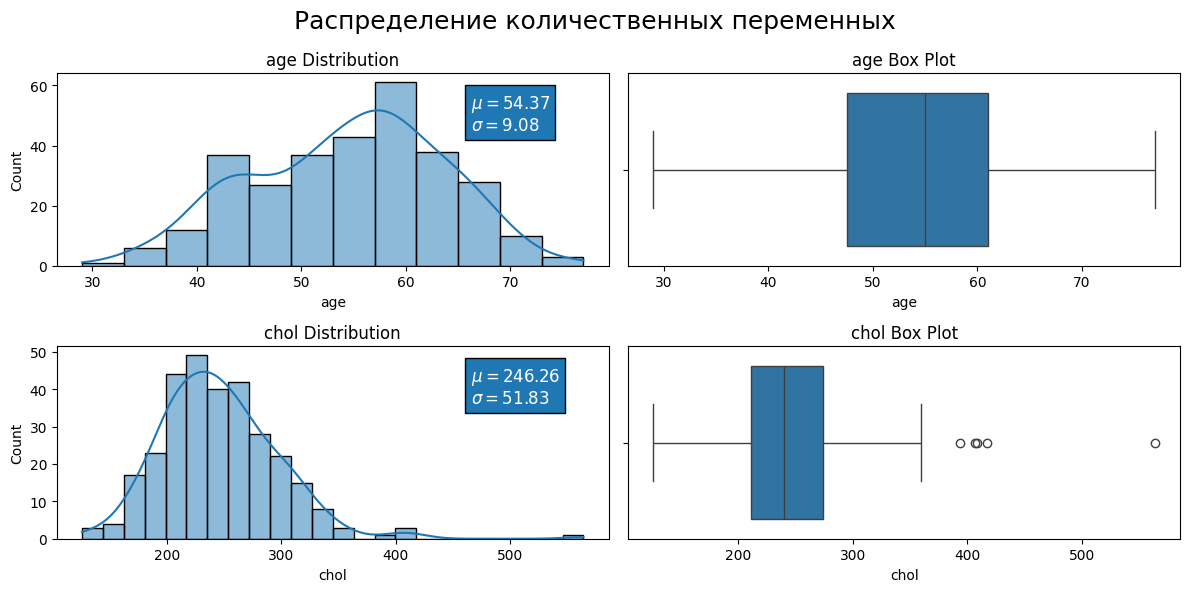

In [ ]:
# Получение спискаколичественных переменных (возраст, уровень холестерина)
numeric_features = ['age', 'chol']
# Определение количества признаков и вычисление количества строк и столбцов для сетки графиков
n_features = len(numeric_features)
n_rows = n_features
n_cols = 2
# Создание сетки графиков
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
# Итерация по количественным признакам и построение гистограмм и box plot
for i, feature in enumerate(numeric_features):
    # Гистограмма
    sns.histplot(data=df_heart, kde=True, x=feature, ax=axs[i, 0])
    axs[i, 0].set_title(f'{feature} Distribution')

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_heart[feature].mean(),
        r'$\sigma=%.2f$' % df_heart[feature].std()
    ))
    axs[i, 0].text(0.75, 0.9, textstr, transform=axs[i, 0].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict())


    # Box plot
    sns.boxplot(data=df_heart, x=feature, ax=axs[i, 1])
    axs[i, 1].set_title(f'{feature} Box Plot')

plt.suptitle('Распределение количественных переменных', fontsize=18)
# Регулировка расстояния между графиками
plt.tight_layout()
# Отображение графиков
plt.show()

### 2) Постройте столбчатые диаграммы для анализа распределения категориальных переменных (пол, тип боли в груди).

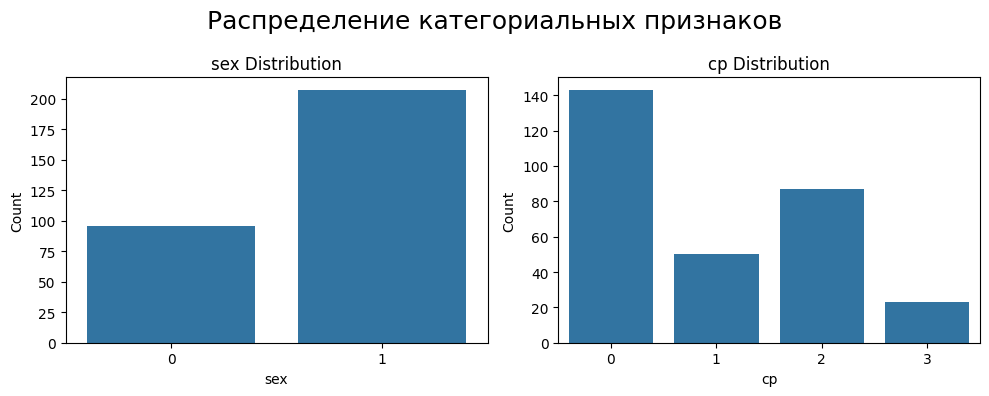

In [ ]:
# Получение списка категориальных признаков
categorical_features = ['sex', 'cp']
# Определение количества признаков
n_features = len(categorical_features)
# Создание сетки графиков
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# Проверка, является ли axs массивом или одиночным объектом Axes
if n_features == 1:
    axs = [axs]
# Итерация по категориальным признакам и построение столбчатых диаграмм
for i, feature in enumerate(categorical_features):
    # Подсчет количества уникальных значений признака
    value_counts = df_heart[feature].value_counts()

    # Столбчатая диаграмма
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axs[i])
    axs[i].set_title(f'{feature} Distribution')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x')
plt.suptitle('Распределение категориальных признаков', fontsize=18)
# Регулировка расстояния между графиками
plt.tight_layout()
# Отображение графиков
plt.show()

## Задание 2
Вам предстоит провести эксперименты с моделью машинного обучения и изучить процесс кросс-валидации и подбора гиперпараметров. Ваша задача состоит в следующем:
1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.
2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.
3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.
4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).
5. Проведите подбор гиперпараметров модели с помощью метода
GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.
6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.
7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.


In [ ]:
# Импорт необходимых библиотек и модулей
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Загрузка данных California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создание модели случайного леса
model = RandomForestRegressor(random_state=42)

# Кросс-валидация для оценки производительности модели на обучающей выборке
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validation RMSE scores: {cv_rmse_scores}')
print(f'Mean RMSE: {cv_rmse_scores.mean()}')


Cross-validation RMSE scores: [0.51136079 0.51730505 0.50809547 0.50515548 0.5156496 ]
Mean RMSE: 0.5115132764541641


In [ ]:
# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None],
    'min_samples_split': [1, 5],
    'min_samples_leaf': [1, 2]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best RMSE: {np.sqrt(-grid_search.best_score_)}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RMSE: 0.5103735482417379


In [ ]:
# Оценка производительности на тестовой выборке с использованием оптимальных параметров
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.5041951330660336


#### Анализ результатов кросс-валидации и подбора гиперпараметров для модели случайного леса в задаче регрессии California Housing:

1. Кросс-валидация:

RMSE (Root Mean Squared Error) на кросс-валидации колеблется от примерно 0.505 до 0.517, среднее значение RMSE составляет около 0.512. RMSE используется для оценки точности модели: чем меньше значение, тем лучше модель предсказывает целевую переменную.

2. Подбор гиперпараметров:

Для подбора оптимальных гиперпараметров (число деревьев n_estimators, максимальная глубина деревьев max_depth, минимальное количество образцов для разделения узла min_samples_split и минимальное количество образцов в листе min_samples_leaf) использовался GridSearchCV.
Лучшие найденные гиперпараметры: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}. Эти параметры помогли достичь наименьшего RMSE на кросс-валидации.

3. Оценка производительности на тестовой выборке:

После настройки модели с оптимальными гиперпараметрами оценивается ее производительность на тестовой выборке.
RMSE на тестовой выборке составил приблизительно 0.504, что даже лучше среднего значения RMSE на кросс-валидации. Это указывает на то, что модель хорошо обобщает данные и не переобучена.


#### Выводы:

Кросс-валидация помогает оценить обобщающую способность модели и избежать переобучения.
Подбор оптимальных гиперпараметров с использованием GridSearchCV позволяет выбрать параметры, которые улучшают производительность модели.
Полученный RMSE на тестовой выборке подтверждает адекватность выбранной модели для предсказания цен на жилье в Калифорнии.

## Задание 3
Задание на ознакомление с датасетом:
Необходимо препроцессировать данные, выбрать только содержательные колонки; сделать описательную статистику нескольких параметров; сформулировать гипотезу о взаимосвязи ваших параметров (например, смертность при раке зависит от пола) и проверить ее с помощью подходящего метода визуализации.
Если сможете выбрать метод и рассчитать статистику вывода, это будет плюсом

In [ ]:
from google.colab import files

# Эта команда откроет диалоговое окно для выбора файла с вашего компьютера
uploaded = files.upload()


Saving clinical.project-tcga-dlbc.2023-09-20.tar.gz to clinical.project-tcga-dlbc.2023-09-20.tar.gz


In [ ]:
import tarfile

# Разархивируем файл
file_name = "clinical.project-tcga-dlbc.2023-09-20.tar.gz"
if tarfile.is_tarfile(file_name):
    with tarfile.open(file_name, "r:gz") as tar:
        tar.extractall()
        print("Файл успешно разархивирован")
else:
    print("Это не tar.gz файл")


Файл успешно разархивирован


In [ ]:
import pandas as pd

# Загрузка TSV файла
df = pd.read_csv('clinical.tsv', sep='\t')

# Просмотр первых строк данных
df.head(2)



,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"


In [ ]:
# Замена значений
data_cleaned = df.apply(lambda x: x.replace(["/'--", "'--"], [pd.NA, pd.NA]))

# Удаление пустых столбцов и излишних id, если есть
# Список столбцов для удаления
columns_to_drop = ['case_submitter_id', 'project_id']
data_cleaned = data_cleaned.drop(columns=columns_to_drop)
data_cleaned = data_cleaned.dropna(axis=1, how='all')
data_cleaned.head(2)

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,<NA>,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,<NA>,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,no,"Radiation Therapy, NOS"


In [ ]:
 data_cleaned.shape

(106, 31)

In [ ]:
data_cleaned.drop_duplicates(inplace=True)
data_cleaned.shape

(106, 31)

#### Гипотеза: Существует зависимость между полом пациента и органом происхождения опухоли.

In [ ]:
data_cleaned.columns

Index(['case_id', 'age_at_index', 'days_to_birth', 'days_to_death',
       'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth',
       'year_of_death', 'age_at_diagnosis', 'ann_arbor_b_symptoms',
       'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement',
       'classification_of_tumor', 'days_to_diagnosis',
       'days_to_last_follow_up', 'icd_10_code', 'last_known_disease_status',
       'morphology', 'primary_diagnosis', 'prior_malignancy',
       'prior_treatment', 'progression_or_recurrence',
       'site_of_resection_or_biopsy', 'synchronous_malignancy',
       'tissue_or_organ_of_origin', 'tumor_grade', 'year_of_diagnosis',
       'treatment_or_therapy', 'treatment_type'],
      dtype='object')

| Название столбца                     | Описание                                                                 |
|-------------------------------------|--------------------------------------------------------------------------|
| case_id                             | Идентификатор случая или пациента                                         |
| age_at_index                        | Возраст на момент индексации или начала исследования                      |
| days_to_birth                       | Количество дней до даты рождения                                          |
| days_to_death                       | Количество дней до даты смерти                                            |
| ethnicity                           | Этническая принадлежность                                                |
| gender                              | Пол                                                                      |
| race                                | Раса                                                                     |
| vital_status                        | Важный статус (живой или мертвый)                                         |
| year_of_birth                       | Год рождения                                                             |
| year_of_death                       | Год смерти (если применимо)                                              |
| age_at_diagnosis                    | Возраст на момент диагностирования болезни                                |
| ann_arbor_b_symptoms                | Симптомы В-типа по классификации Анн-Арбор                                |
| ann_arbor_clinical_stage            | Клиническая стадия по классификации Анн-Арбор                             |
| ann_arbor_extranodal_involvement    | Вовлеченность экстранодальных участков по классификации Анн-Арбор         |
| classification_of_tumor             | Классификация опухоли                                                    |
| days_to_diagnosis                   | Количество дней до даты диагностирования                                   |
| days_to_last_follow_up              | Количество дней до последнего последующего наблюдения                      |
| icd_10_code                         | Код МКБ-10 (Международная классификация болезней)                         |
| last_known_disease_status           | Последний известный статус заболевания                                    |
| morphology                          | Морфология (структура) опухоли                                            |
| primary_diagnosis                   | Основной диагноз                                                         |
| prior_malignancy                    | Наличие предыдущего злокачественного заболевания                          |
| prior_treatment                     | Предыдущее лечение                                                       |
| progression_or_recurrence           | Прогрессирование или рецидив заболевания                                  |
| site_of_resection_or_biopsy         | Место резекции или биопсии                                               |
| synchronous_malignancy              | Синхронное злокачественное заболевание                                    |
| tissue_or_organ_of_origin           | Ткань или орган происхождения                                            |
| tumor_grade                         | Градация опухоли                                                         |
| year_of_diagnosis                   | Год диагностирования                                                     |
| treatment_or_therapy                | Лечение или терапия                                                      |
| treatment_type                      | Тип лечения или терапии                                                  |


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Создание кросс-таблицы
cross_table = pd.crosstab(data_cleaned['gender'], data_cleaned['tissue_or_organ_of_origin'])

# Выполнение теста хи-квадрат
chi2, p, dof, expected = chi2_contingency(cross_table)

# Вывод результатов
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Есть статистически значимая связь между полом и тканью/органом происхождения.")
else:
    print("Нет статистически значимой связи между полом и тканью/органом происхождения.")


Chi-square statistic: 38.09790209790211
P-value: 0.005766792110418446
Есть статистически значимая связь между полом и тканью/органом происхождения.


Так как p-значение меньше уровня значимости (например, α = 0.05), мы отвергаем нулевую гипотезу. Это означает, что существует статистически значимая связь между полом и тканью/органом происхождения.



Для визуализации и проверки гипотезы о влиянии пола на ткань или орган происхождения можно использовать столбчатую диаграмму с распределением количества наблюдений по каждой категории ткани/органа происхождения в зависимости от пола.

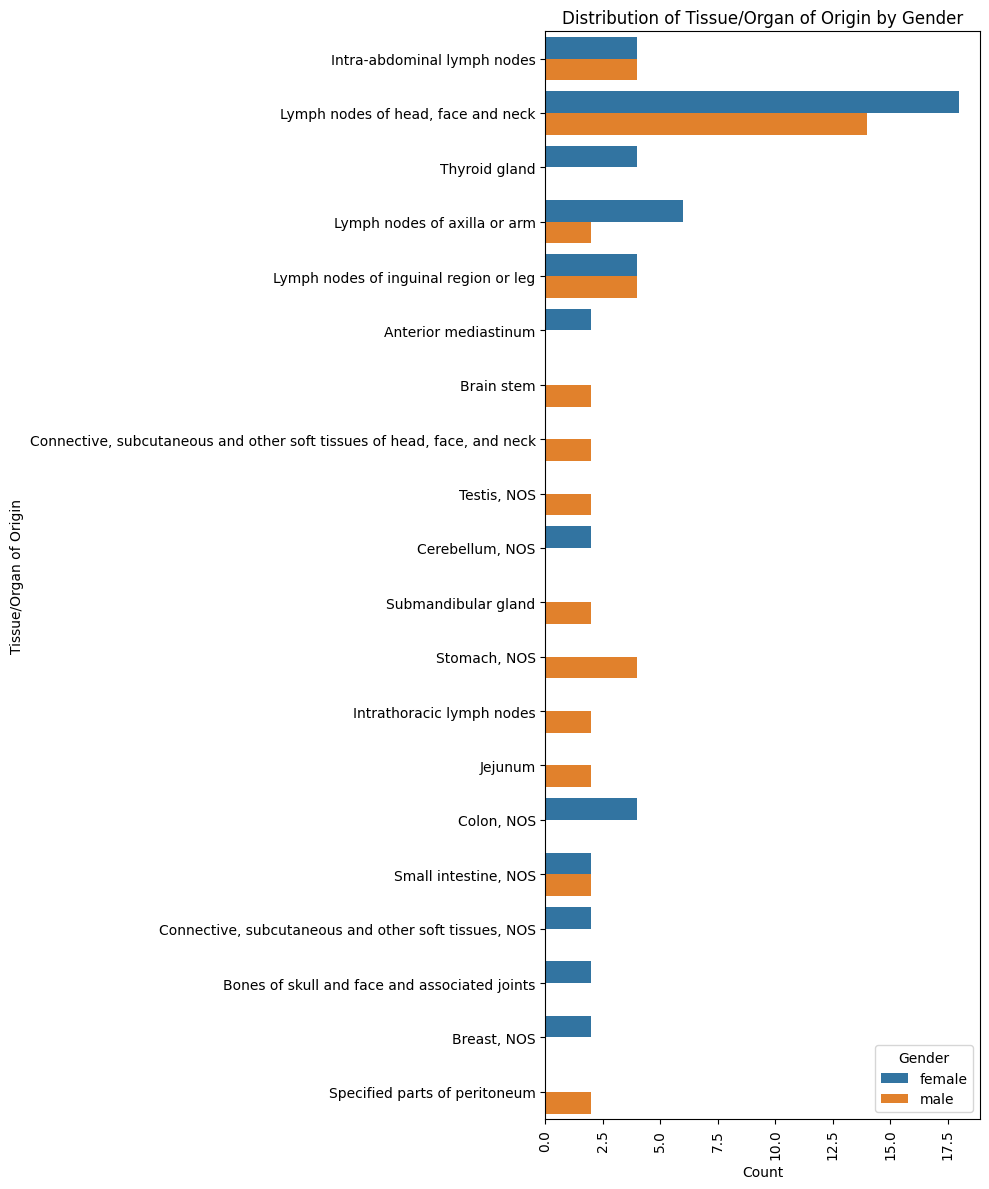

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 12))
sns.countplot(y='tissue_or_organ_of_origin', hue='gender', data=data_cleaned)
plt.xticks(rotation=90)
plt.ylabel('Tissue/Organ of Origin')
plt.xlabel('Count')
plt.title('Distribution of Tissue/Organ of Origin by Gender')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

1. Наиболее распространенные ткани/органы:

- Lymph nodes of head, face and neck являются наиболее часто встречающейся тканью/органом для обоих полов, с небольшим перевесом для мужчин.
- Lymph nodes of inguinal region or leg также часто встречаются и почти одинаково распространены среди мужчин и женщин.
- Intra-abdominal lymph nodes встречаются несколько чаще у женщин.

2. Значимые различия между полами:

- Testis, NOS: ожидаемо, данный орган встречается исключительно у мужчин.
- Breast, NOS: ожидаемо, данный орган встречается исключительно у женщин.
- Colon, NOS: встречается чаще у мужчин.
- Thyroid gland: также чаще встречается у женщин.

3. Меньше распространенные ткани/органы:

- Органы, такие как Brain stem, Anterior mediastinum, Submandibular gland и Jejunum, встречаются реже и имеют небольшие различия в распределении по полу.

4. Результаты статистического теста
На основании предоставленных результатов теста хи-квадрат, можно сделать вывод, что существует статистически значимая связь между полом и тканью/органом происхождения (Chi-square statistic: 38.09790209790211, P-value: 0.005766792110418446).

#### Заключение
График наглядно показывает, что есть определенные ткани и органы, которые распределяются по полу с определенными закономерностями. Например, тестис и грудь очевидно имеют ярко выраженные гендерные различия. Более того, некоторые другие органы, такие как колоно и щитовидная железа, также показывают значительные различия между полами.